In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
path = "https://raw.githubusercontent.com/Mondol007/Datasets/main/Breast_cancer_data.csv"
dataset = pd.read_csv(path)
dataset.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
dataset.shape

(569, 6)

<Axes: >

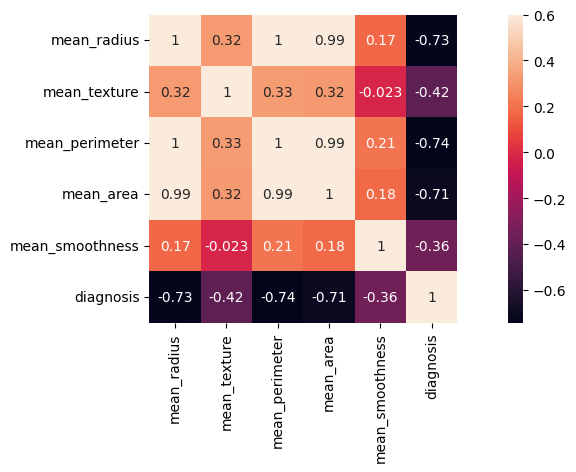

In [ ]:
#Correlation Matrix

plt.figure(figsize=(13,4))
sns.heatmap(dataset.corr(), vmax=0.6, square=True, annot=True)

In [ ]:
dataset.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [ ]:
train, test = train_test_split(dataset, test_size=.2, random_state=41)
X_train = train.iloc[:,:-1].values
Y_train = train.iloc[:,-1].values
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(455, 5)
(455,)
(114, 5)
(114,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
# Initialize the neural network architecture
input_size = X_train.shape[1]
hidden_size = 150
output_size = 1

# Randomly initialize weights and biases
weights_input_hidden = np.random.rand(input_size, hidden_size)
bias_hidden = np.random.rand(1, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)
bias_output = np.random.rand(1, output_size)

learning_rate = 0.01
epochs = 20

# Training the neural network
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output = sigmoid(output_layer_input)

    # Backpropagation
    error = Y_train.reshape(-1, 1) - output
    d_output = error * sigmoid_derivative(output)

    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X_train.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Testing the trained MLP on the test set
hidden_layer_test = sigmoid(np.dot(X_test, weights_input_hidden) + bias_hidden)
output_test = sigmoid(np.dot(hidden_layer_test, weights_hidden_output) + bias_output)
y_pred = np.round(output_test).flatten().astype(int)

accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 8), max_iter=500, alpha=0.0001,
                    solver='adam', verbose=0, random_state=42)

mlp.fit(X_train, Y_train)

# Testing the trained MLP on the test set
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.37%


In [ ]:
cnf_matrix = confusion_matrix(Y_test, y_pred)

<Axes: >

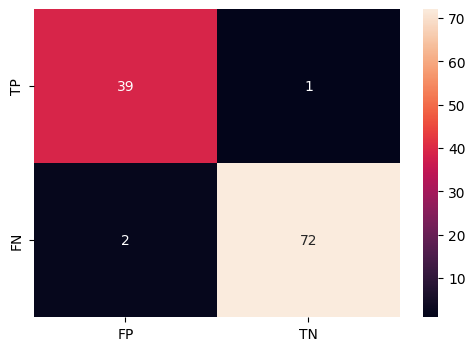

In [ ]:
import seaborn as sns
true_class_names = ['TP', 'FN']
predicted_class_names = ['FP', 'TN']

df_cnf_matrix = pd.DataFrame(cnf_matrix,
                             index = true_class_names,
                             columns = predicted_class_names)

plt.figure(figsize = (13,4))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

Multi-Layer neural network to solve XOR problem

In [ ]:
import numpy as np

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

# Initialize weights and biases
input_size = 2
hidden_size = 4
output_size = 1

np.random.seed(42)
weights_input_hidden = np.random.rand(input_size, hidden_size)
bias_hidden = np.random.rand(1, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)
bias_output = np.random.rand(1, output_size)

learning_rate = 0.1
epochs = 10000

# Training
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output = sigmoid(output_layer_input)

    # Backpropagation
    error = y - output
    d_output = error * sigmoid_derivative(output)

    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Testing the trained MLP on the XOR problem
hidden_layer_test = sigmoid(np.dot(X, weights_input_hidden) + bias_hidden)
output_test = sigmoid(np.dot(hidden_layer_test, weights_hidden_output) + bias_output)


output_rounded = np.round(output_test)


accuracy = np.mean(output_rounded == y) * 100
print(f"Accuracy: {accuracy:.2f}%")

for i in range(len(X)):
    print(f"Input: {X[i]} - Predicted Output: {output_rounded[i][0]}")


Accuracy: 100.00%
Input: [0 0] - Predicted Output: 0.0
Input: [0 1] - Predicted Output: 1.0
Input: [1 0] - Predicted Output: 1.0
Input: [1 1] - Predicted Output: 0.0


<ipython-input-16-5bbea71a4cab>:35: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, zz, levels=[0.5], colors='red', label='Decision Boundary')


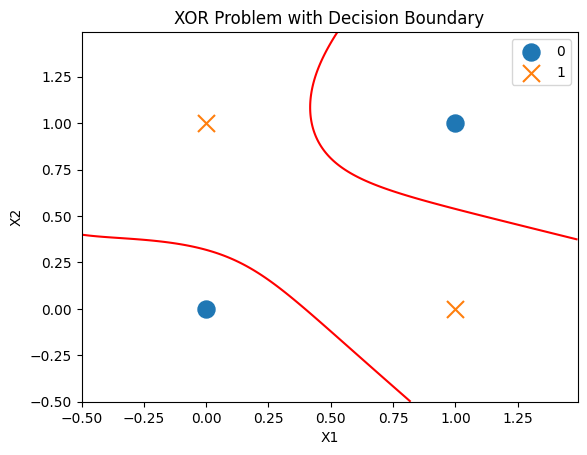

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define a mesh grid to cover the input space
h = 0.01
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Concatenate xx and yy to create input points
input_points = np.c_[xx.ravel(), yy.ravel()]

# Forward pass through the trained network to get predictions for the mesh grid
hidden_layer_input = np.dot(input_points, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
output = sigmoid(output_layer_input)

# Reshape the output to match the mesh grid shape
zz = output.reshape(xx.shape)

# Scatter plot of XOR points
plt.scatter(X[y.flatten() == 0][:, 0], X[y.flatten() == 0][:, 1], marker='o', s=150, label='0')
plt.scatter(X[y.flatten() == 1][:, 0], X[y.flatten() == 1][:, 1], marker='x', s=150, label='1')

# Contour plot for the decision boundary
plt.contour(xx, yy, zz, levels=[0.5], colors='red', label='Decision Boundary')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('XOR Problem with Decision Boundary')
plt.legend()
plt.show()
